In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
from evaluation import evaluate_heursitic_grid
from environment import RoadEnvironment
from environment_presets import small_environment_dict, smallest_environment_dict
from policies.heuristics import TCBMHeuristicAgent

In [21]:
parameter_dict = {
    "threshold": np.arange(0,1.05,0.05),
    "inspection_interval": np.arange(1, 21),
}

environment = RoadEnvironment(**smallest_environment_dict)

threshold_area = 0.5
inspection_interval_area = 10

number_of_episodes = 10000
filename = f"results/TCBM_heuristic_grid_search_{threshold_area:0.2f}_{inspection_interval_area}_{number_of_episodes}"

results = evaluate_heursitic_grid(
    environment = environment,
    heuristic_class = TCBMHeuristicAgent,
    parameter_dict = parameter_dict,
    number_of_episodes = number_of_episodes,
    number_of_processes = 32,
    result_path = f"{filename}.csv",
    overwrite = True,
)

results

threshold: 1.0 inspection_interval: 20 - Avg: -722.22, Std: 3.48: 100%|██████████| 420/420 [15:59<00:00,  2.28s/it]                 


,threshold,inspection_interval,reward_mean,reward_std,episodes
0,0.0,1.0,-306.5622,99.079864,10000.0
1,0.0,2.0,-198.8519,99.398123,10000.0
2,0.0,3.0,-162.9490,99.503907,10000.0
3,0.0,4.0,-139.0271,99.588458,10000.0
4,0.0,5.0,-127.0624,99.628271,10000.0
...,...,...,...,...,...
415,1.0,16.0,-734.2245,3.482686,10000.0
416,1.0,17.0,-722.2245,3.482686,10000.0
417,1.0,18.0,-722.2245,3.482686,10000.0
418,1.0,19.0,-722.2245,3.482686,10000.0


In [25]:
import pandas as pd 
# load results
filename = "results/TCBM_heuristic_grid_search_0.13_10_10000"
results = pd.read_csv(f"{filename}.csv")

# find best parameters
best = results.sort_values("reward_mean", ascending=False).head(1)
best_reward_mean = best["reward_mean"].values[0]
best_reward_std = best["reward_std"].values[0]
best_reward_std_error = best["reward_std"].values[0] / np.sqrt(best["episodes"].values[0])

print("Best parameters:")
print(best)
print("\t with std error: {:.2f}".format(best_reward_std_error))

std_error_reward_range = best_reward_mean - best_reward_std_error

best_results = results[results["reward_mean"] >= std_error_reward_range].sort_values("reward_mean", ascending=False)
best_results

Best parameters:
    threshold  inspection_interval  reward_mean  reward_std  episodes
18     0.1279                 10.0   -1087.4033  244.787123   10000.0
	 with std error: 2.45


,threshold,inspection_interval,reward_mean,reward_std,episodes
18,0.12790,10.0,-1087.4033,244.787123,10000.0
16,0.12780,10.0,-1087.4225,244.762259,10000.0
15,0.12775,10.0,-1087.4225,244.762259,10000.0
14,0.12770,10.0,-1087.4225,244.762259,10000.0
10,0.12750,10.0,-1087.4230,244.762120,10000.0
13,0.12765,10.0,-1087.4230,244.762120,10000.0
12,0.12760,10.0,-1087.4230,244.762120,10000.0
11,0.12755,10.0,-1087.4230,244.762120,10000.0
9,0.12745,10.0,-1087.4230,244.762120,10000.0
8,0.12740,10.0,-1087.4230,244.762120,10000.0


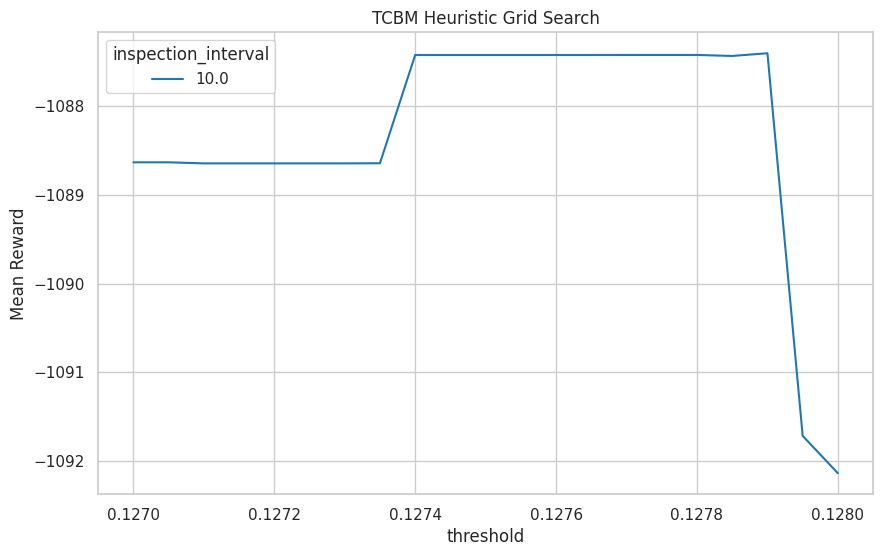

In [36]:
# load results
results = pd.read_csv(f"{filename}.csv")

# plot results
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=results, x="threshold", y="reward_mean", hue="inspection_interval", ax=ax, palette="tab10" # options: "Set1", "Set2", "Set3", "tab10", "Paired"
)
ax.set_title("TCBM Heuristic Grid Search")
ax.set_ylabel("Mean Reward")

plt.savefig(f"{filename}.png", dpi=300)
plt.show()


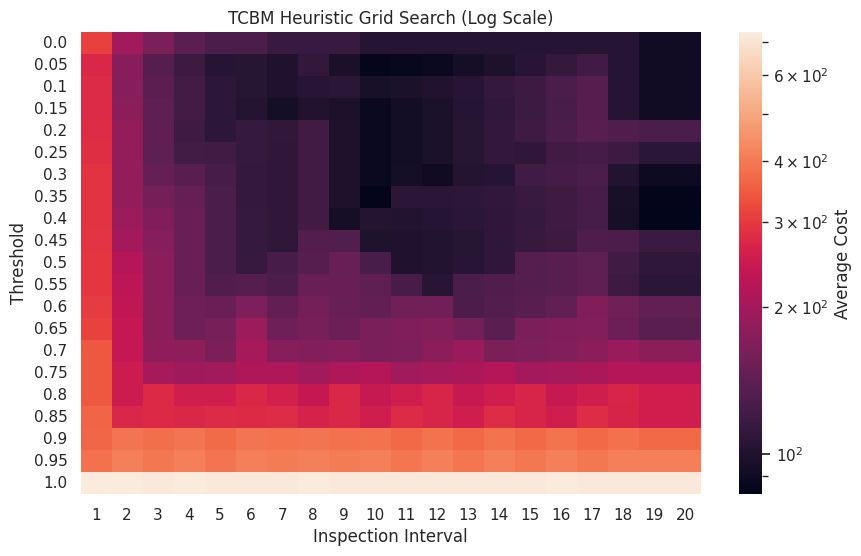

In [24]:
# plot as 2d heatmap
from matplotlib.colors import LogNorm

results["threshold"] = results["threshold"].round(5)
results["inspection_interval"] = results["inspection_interval"].astype(int)

results = results.pivot(index="threshold", columns="inspection_interval", values="reward_mean")

# make reward_mean positive
results = -results

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results, ax=ax, norm=LogNorm())
ax.set_title("TCBM Heuristic Grid Search (Log Scale)")
ax.set_ylabel("Threshold")
ax.set_xlabel("Inspection Interval")
ax.collections[0].colorbar.set_label("Average Cost")

plt.savefig(f"{filename}_heatmap.png", dpi=300)
plt.show()